In [3]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import sklearn as sk
import matplotlib.pyplot as plt
import seaborn as sns
import os, sys

In [ ]:
import tensorflow

In [3]:
from mmlspark import LightGBMClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
lgb_estimator = LightGBMClassifier(learningRate=0.1, 
                                   numIterations=1000,
                                   earlyStoppingRound=10,
                                   labelCol="label")
paramGrid = ParamGridBuilder().addGrid(lgb_estimator.numLeaves, [30, 50]).build()
eval = BinaryClassificationEvaluator(labelCol="label",metricName="areaUnderROC")
crossval = CrossValidator(estimator=lgb_estimator,
                          estimatorParamMaps=paramGrid, 
                          evaluator=eval, 
                          numFolds=3)     
cvModel  = crossval.fit(train_df[["features", "label"]])

ModuleNotFoundError: No module named 'mmlspark'

In [815]:
os.listdir()

['.ipynb_checkpoints',
 'ANN model.ipynb',
 'Data.xlsx',
 'Dayo ANN',
 'DSN INTERCAMPUS 2019.ipynb',
 'DSN intercampus competition.ipynb',
 'dtc1.csv',
 'fingerprint authentication using R305 module in python.ipynb',
 'gbrt.csv',
 'gbrt_k.csv',
 'intercampusai2019.zip',
 'journal.pdf',
 'Mercy',
 'my_clf.csv',
 'rand.csv',
 'rand_update.csv',
 'rank.csv',
 'rank_k.csv',
 'Recommendation Engine',
 'sample_submission2.csv',
 'test.csv',
 'train.csv',
 'Untitled.ipynb',
 'xgb.csv',
 'xgb_fortify.csv',
 'xgb_renew.csv',
 'xgb_update.csv',
 'xgb_update1.csv',
 'xgb_update2.csv',
 'xgb_update3.csv']

In [816]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [817]:
train_data.head()

EmployeeNo                               Division        Qualification  \
0  YAK/S/00001         Commercial Sales and Marketing     MSc, MBA and PhD   
1  YAK/S/00002  Customer Support and Field Operations  First Degree or HND   
2  YAK/S/00003         Commercial Sales and Marketing  First Degree or HND   
3  YAK/S/00004         Commercial Sales and Marketing  First Degree or HND   
4  YAK/S/00006               Information and Strategy  First Degree or HND   

   Gender   Channel_of_Recruitment  Trainings_Attended  Year_of_birth  \
0  Female  Direct Internal process                   2           1986   
1    Male        Agency and others                   2           1991   
2    Male  Direct Internal process                   2           1987   
3    Male        Agency and others                   3           1982   
4    Male  Direct Internal process                   3           1990   

   Last_performance_score  Year_of_recruitment  Targets_met  Previous_Award  \
0                    12.5                 2011            1               0   
1                    12.5                 2015            0               0   
2                     7.5                 2012            0               0   
3                     2.5                 2009            0               0   
4                     7.5                 2012            0               0   

   Training_score_average State_Of_Origin Foreign_schooled Marital_Status  \
0                      41         ANAMBRA               No        Married   
1                      52         ANAMBRA              Yes        Married   
2                      42         KATSINA              Yes        Married   
3                      42           NIGER              Yes         Single   
4                      77       AKWA IBOM              Yes        Married   

  Past_Disciplinary_Action Previous_IntraDepartmental_Movement  \
0                       No                                  No   
1                       No                                  No   
2                       No                                  No   
3                       No                                  No   
4                       No                                  No   

  No_of_previous_employers  Promoted_or_Not  
0                        0                0  
1                        0                0  
2                        0                0  
3                        1                0  
4                        1                0

In [818]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 19 columns):
EmployeeNo                             38312 non-null object
Division                               38312 non-null object
Qualification                          36633 non-null object
Gender                                 38312 non-null object
Channel_of_Recruitment                 38312 non-null object
Trainings_Attended                     38312 non-null int64
Year_of_birth                          38312 non-null int64
Last_performance_score                 38312 non-null float64
Year_of_recruitment                    38312 non-null int64
Targets_met                            38312 non-null int64
Previous_Award                         38312 non-null int64
Training_score_average                 38312 non-null int64
State_Of_Origin                        38312 non-null object
Foreign_schooled                       38312 non-null object
Marital_Status                         383

In [819]:
train_data.describe()

Trainings_Attended  Year_of_birth  Last_performance_score  \
count        38312.000000   38312.000000            38312.000000   
mean             2.253680    1986.209334                7.698959   
std              0.609443       7.646047                3.744135   
min              2.000000    1950.000000                0.000000   
25%              2.000000    1982.000000                5.000000   
50%              2.000000    1988.000000                7.500000   
75%              2.000000    1992.000000               10.000000   
max             11.000000    2001.000000               12.500000   

       Year_of_recruitment   Targets_met  Previous_Award  \
count         38312.000000  38312.000000    38312.000000   
mean           2013.139695      0.352996        0.023152   
std               4.261451      0.477908        0.150388   
min            1982.000000      0.000000        0.000000   
25%            2012.000000      0.000000        0.000000   
50%            2014.000000      0.000000        0.000000   
75%            2016.000000      1.000000        0.000000   
max            2018.000000      1.000000        1.000000   

       Training_score_average  Promoted_or_Not  
count            38312.000000     38312.000000  
mean                55.366465         0.084595  
std                 13.362741         0.278282  
min                 31.000000         0.000000  
25%                 43.000000         0.000000  
50%                 52.000000         0.000000  
75%                 68.000000         0.000000  
max                 91.000000         1.000000

# VISUALIZATION OF THE DATA DISTRIBUTION

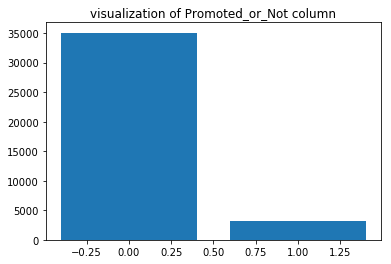

In [820]:
def value_count(data,key):
    data = data[key].value_counts()
    plt.bar(data.keys(), data.values.astype(int))
    plt.title('visualization of '+ key + ' column')
    plt.show()
    return
value_count(train_data, 'Promoted_or_Not')

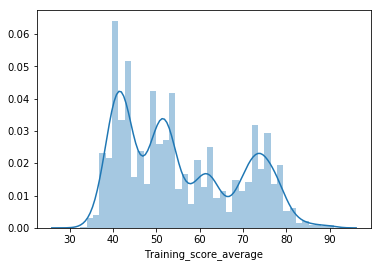

In [821]:
sns.distplot(train_data['Training_score_average'])
plt.show()

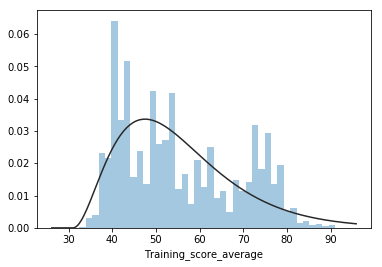

In [822]:
from scipy import stats
sns.distplot(train_data['Training_score_average'], kde=False, fit=stats.gamma)
plt.show()

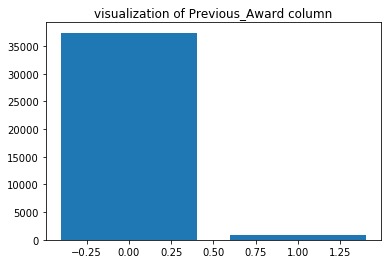

In [823]:
value_count(train_data, 'Previous_Award')

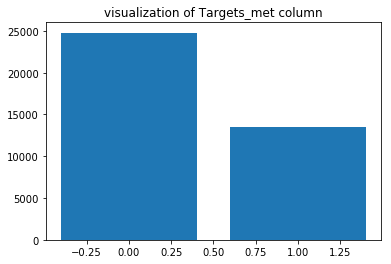

In [824]:
value_count(train_data, 'Targets_met')

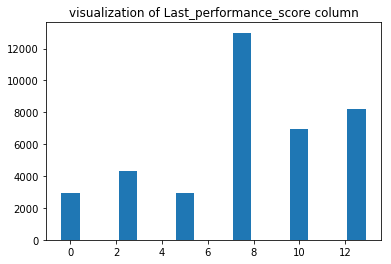

In [825]:
value_count(train_data, 'Last_performance_score')

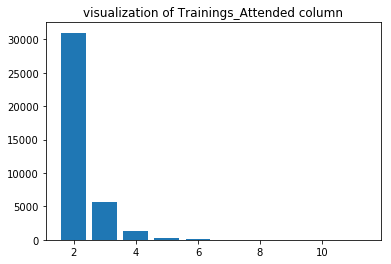

In [826]:
value_count(train_data, 'Trainings_Attended')

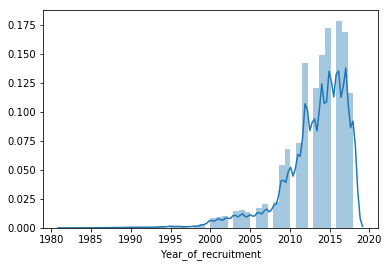

In [827]:
sns.distplot(train_data['Year_of_recruitment'])
plt.show()

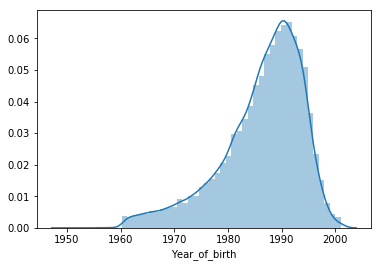

In [828]:
sns.distplot(train_data['Year_of_birth'])
plt.show()

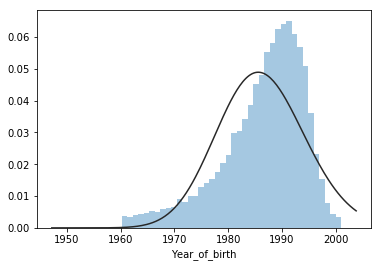

In [829]:
from scipy import stats
sns.distplot(train_data['Year_of_birth'], kde=False, fit=stats.gamma)
plt.show()

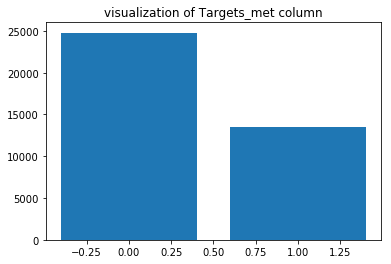

In [830]:
value_count(train_data, 'Targets_met')

In [831]:
def report(data, target):
    val = data.value_counts()
    final_dict = {}
    output_data = []
    for k in val.keys():
        sample = [data == k]
        count_zero, count_one = 0,0
        for i, j in zip(sample[0], target):
            if i == True:
                if j == True:
                    count_one+= 1
                else:
                    count_zero+= 1
            else:
                pass
        
        final_dict[k] = (count_zero, count_one)
    # give prority to the 1's with target
    for key in final_dict.keys():
        final_dict[key][1]
    return final_dict

dictionary = report(train_data['Targets_met'], train_data['Promoted_or_Not'])

In [832]:
dictionary

{0: (23835, 953), 1: (11236, 2288)}

In [833]:
#train_data = train_data.drop(['Division','Gender', 'Channel_of_Recruitment','Year_of_birth', 'State_Of_Origin', 'Foreign_schooled','Marital_Status'], axis = 1)
#test_data = test_data.drop(['Division','Gender', 'Channel_of_Recruitment','Year_of_birth', 'State_Of_Origin', 'Foreign_schooled','Marital_Status'], axis = 1)


In [834]:
dictionary = report(train_data['Training_score_average'], train_data['Promoted_or_Not'])

In [835]:
dictionary

{31: (1, 0),
 32: (5, 0),
 33: (17, 1),
 34: (39, 2),
 35: (129, 7),
 36: (225, 6),
 37: (453, 19),
 38: (795, 25),
 39: (1167, 52),
 40: (1645, 74),
 41: (1800, 73),
 42: (1792, 75),
 43: (1559, 75),
 44: (1218, 49),
 45: (860, 27),
 46: (665, 37),
 47: (593, 34),
 48: (708, 49),
 49: (952, 62),
 50: (1268, 88),
 51: (1350, 97),
 52: (1419, 98),
 53: (1212, 92),
 54: (964, 80),
 55: (615, 65),
 56: (445, 65),
 57: (368, 54),
 58: (371, 39),
 59: (460, 53),
 60: (611, 50),
 61: (655, 61),
 62: (655, 92),
 63: (570, 79),
 64: (458, 58),
 65: (318, 35),
 66: (243, 43),
 67: (245, 36),
 68: (316, 31),
 69: (444, 48),
 70: (569, 64),
 71: (741, 56),
 72: (757, 84),
 73: (841, 98),
 74: (920, 107),
 75: (727, 98),
 76: (732, 81),
 77: (680, 74),
 78: (547, 77),
 79: (405, 54),
 80: (249, 50),
 81: (161, 53),
 82: (78, 57),
 83: (33, 48),
 84: (13, 59),
 85: (5, 47),
 86: (2, 52),
 87: (0, 31),
 88: (1, 29),
 89: (0, 36),
 90: (0, 31),
 91: (0, 24)}

In [836]:
dictionary = report(train_data['Previous_Award'], train_data['Promoted_or_Not'])

dictionary

{0: (34582, 2843), 1: (489, 398)}

# Unbiased features

In [837]:
train_data.columns

Index(['EmployeeNo', 'Division', 'Qualification', 'Gender',
       'Channel_of_Recruitment', 'Trainings_Attended', 'Year_of_birth',
       'Last_performance_score', 'Year_of_recruitment', 'Targets_met',
       'Previous_Award', 'Training_score_average', 'State_Of_Origin',
       'Foreign_schooled', 'Marital_Status', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Promoted_or_Not'],
      dtype='object')

In [838]:
final_target = test_data['EmployeeNo']

In [839]:
train_data = train_data[['Year_of_recruitment','Year_of_birth','Qualification', 'Last_performance_score','Targets_met','Previous_Award','Training_score_average','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement','No_of_previous_employers','Division', 'Gender','Channel_of_Recruitment','Marital_Status','Foreign_schooled', 'Promoted_or_Not']]
test_data = test_data[['Year_of_recruitment','Year_of_birth','Qualification', 'Last_performance_score','Targets_met','Previous_Award','Training_score_average','Past_Disciplinary_Action','Previous_IntraDepartmental_Movement','No_of_previous_employers','Division', 'Gender','Channel_of_Recruitment','Marital_Status','Foreign_schooled']]


In [840]:
def bin_year_of_birth(data):
    return_val = []
    for k in data:
        if k < 1960 and k>=1950:
            return_val.append(4)
        elif k < 1970 and k >= 1961:
            return_val.append(3)
            
        elif k < 1980 and k >= 1971:
            return_val.append(2)
        elif k < 1990 and k >= 1981:
            return_val.append(1)
            
        else:
            return_val.append(0)
    return return_val


train_data['Year_of_birth'] = bin_year_of_birth(train_data['Year_of_birth'])
test_data['Year_of_birth'] = bin_year_of_birth(test_data['Year_of_birth'])

In [841]:
def bin_year_of_recruitment(data):
    return_val = []
    for k in data:
        if k <1987 and k >=1982:
            return_val.append(0)
        elif k < 1993 and k >= 1988:
            return_val.append(1)
        elif k < 1999 and k >= 1994:
            return_val.append(2)
            
        elif k <2005 and k >= 2000:
            return_val.append(3)
        elif k <2011 and k>= 2006:
            return_val.append(4)
        else:
            return_val.append(5)
            
    return return_val

train_data['Year_of_recruitment'] = bin_year_of_birth(train_data['Year_of_recruitment'])
test_data['Year_of_recruitment'] = bin_year_of_birth(test_data['Year_of_recruitment'])


In [842]:
train_data['Foreign_schooled'].value_counts()

Yes    34995
No      3317
Name: Foreign_schooled, dtype: int64

In [843]:
#train_data['Foreign_schooled'][train_data['Foreign_schooled'] == 'Yes'] = 1
#train_data['Foreign_schooled'][train_data['Foreign_schooled'] == 'No'] = 0 

#test_data['Foreign_schooled'][test_data['Foreign_schooled'] == 'Yes'] = 1
#test_data['Foreign_schooled'][test_data['Foreign_schooled'] == 'No'] = 0 
train_data = train_data.drop(['Foreign_schooled'], axis = 1)
test_data = test_data.drop(['Foreign_schooled'], axis = 1)


In [844]:
train_data.columns

Index(['Year_of_recruitment', 'Year_of_birth', 'Qualification',
       'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Division', 'Gender', 'Channel_of_Recruitment', 'Marital_Status',
       'Promoted_or_Not'],
      dtype='object')

In [845]:
test_data['Division'].value_counts()

Commercial Sales and Marketing                 5145
Customer Support and Field Operations          3375
Information Technology and Solution Support    2186
Sourcing and Purchasing                        2086
Information and Strategy                       1631
Business Finance Operations                     750
People/HR Management                            714
Regulatory and Legal services                   306
Research and Innovation                         303
Name: Division, dtype: int64

In [846]:
dictionary = report(train_data['Division'], train_data['Promoted_or_Not'])
dictionary

{'Business Finance Operations': (1640, 146),
 'Commercial Sales and Marketing': (10854, 841),
 'Customer Support and Field Operations': (7269, 704),
 'Information Technology and Solution Support': (4420, 532),
 'Information and Strategy': (3373, 348),
 'People/HR Management': (1607, 97),
 'Regulatory and Legal services': (692, 41),
 'Research and Innovation': (653, 43),
 'Sourcing and Purchasing': (4563, 489)}

In [847]:
#train_data['Division'][train_data['Division'] == 'Commercial Sales and Marketing'] = 0
#train_data['Division'][train_data['Division'] == 'Customer Support and Field Operations'] = 1
#train_data['Division'][train_data['Division'] == 'Information Technology and Solution Support'] = 2
#train_data['Division'][train_data['Division'] == 'Sourcing and Purchasing'] = 3
#train_data['Division'][train_data['Division'] == 'Information and Strategy'] = 4
#train_data['Division'][train_data['Division'] == 'Business Finance Operations'] = 5
#train_data['Division'][train_data['Division'] == 'People/HR Management'] = 6
#train_data['Division'][train_data['Division'] == 'Regulatory and Legal services'] = 7
#train_data['Division'][train_data['Division'] == 'Research and Innovation'] = 8


#test_data['Division'][test_data['Division'] == 'Commercial Sales and Marketing'] = 0
#test_data['Division'][test_data['Division'] == 'Customer Support and Field Operations'] = 1
#test_data['Division'][test_data['Division'] == 'Information Technology and Solution Support'] = 2
#test_data['Division'][test_data['Division'] == 'Sourcing and Purchasing'] = 3
#test_data['Division'][test_data['Division'] == 'Information and Strategy'] = 4
#test_data['Division'][test_data['Division'] == 'Business Finance Operations'] = 5
#test_data['Division'][test_data['Division'] == 'People/HR Management'] = 6
#test_data['Division'][test_data['Division'] == 'Regulatory and Legal services'] = 7
#test_data['Division'][test_data['Division'] == 'Research and Innovation'] = 8

train_data = pd.get_dummies(train_data, columns = ['Division'])
test_data = pd.get_dummies(test_data, columns = ['Division'])

In [848]:
train_data.columns

Index(['Year_of_recruitment', 'Year_of_birth', 'Qualification',
       'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Gender', 'Channel_of_Recruitment', 'Marital_Status', 'Promoted_or_Not',
       'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing'],
      dtype='object')

In [849]:
dictionary = report(train_data['Gender'], train_data['Promoted_or_Not'])
dictionary

{'Female': (10414, 1018), 'Male': (24657, 2223)}

In [850]:
dictionary = report(train_data['Channel_of_Recruitment'], train_data['Promoted_or_Not'])
dictionary

{'Agency and others': (19514, 1796),
 'Direct Internal process': (14847, 1347),
 'Referral and Special candidates': (710, 98)}

In [851]:
train_data['Channel_of_Recruitment'][train_data['Channel_of_Recruitment'] == 'Agency and others'] = 2
train_data['Channel_of_Recruitment'][train_data['Channel_of_Recruitment'] == 'Direct Internal process'] = 0
train_data['Channel_of_Recruitment'][train_data['Channel_of_Recruitment'] == 'Referral and Special candidates'] = 1



test_data['Channel_of_Recruitment'][test_data['Channel_of_Recruitment'] == 'Agency and others'] = 2
test_data['Channel_of_Recruitment'][test_data['Channel_of_Recruitment'] == 'Direct Internal process'] = 0
test_data['Channel_of_Recruitment'][test_data['Channel_of_Recruitment'] == 'Referral and Special candidates'] = 1

In [852]:
dictionary = report(train_data['Marital_Status'], train_data['Promoted_or_Not'])
dictionary

{'Married': (28386, 2636), 'Not_Sure': (324, 39), 'Single': (6361, 566)}

In [853]:
train_data['Marital_Status'][train_data['Marital_Status'] == 'Married'] = 0
train_data['Marital_Status'][train_data['Marital_Status'] == 'Single'] = 1
train_data['Marital_Status'][train_data['Marital_Status'] == 'Not_Sure'] = 0

test_data['Marital_Status'][test_data['Marital_Status'] == 'Married'] = 0
test_data['Marital_Status'][test_data['Marital_Status'] == 'Single'] = 1
test_data['Marital_Status'][test_data['Marital_Status'] == 'Not_Sure'] = 0
#train_data = train_data.drop('Marital_Status', axis = 1)
#test_data = test_data.drop('Marital_Status', axis = 1)

In [854]:
train_data.columns

Index(['Year_of_recruitment', 'Year_of_birth', 'Qualification',
       'Last_performance_score', 'Targets_met', 'Previous_Award',
       'Training_score_average', 'Past_Disciplinary_Action',
       'Previous_IntraDepartmental_Movement', 'No_of_previous_employers',
       'Gender', 'Channel_of_Recruitment', 'Marital_Status', 'Promoted_or_Not',
       'Division_Business Finance Operations',
       'Division_Commercial Sales and Marketing',
       'Division_Customer Support and Field Operations',
       'Division_Information Technology and Solution Support',
       'Division_Information and Strategy', 'Division_People/HR Management',
       'Division_Regulatory and Legal services',
       'Division_Research and Innovation', 'Division_Sourcing and Purchasing'],
      dtype='object')

In [855]:
dictionary = report(train_data['Gender'], train_data['Promoted_or_Not'])
dictionary

{'Female': (10414, 1018), 'Male': (24657, 2223)}

In [856]:
train_data = pd.get_dummies(train_data, columns = ['Gender'])
test_data = pd.get_dummies(test_data, columns = ['Gender'])
#train_data = train_data.drop(['Division','Gender'], axis = 1)
#test_data = test_data.drop(['Division','Gender'], axis = 1)

### Direct features

In [857]:
dictionary = report(train_data['Qualification'], train_data['Promoted_or_Not'])
dictionary

{'First Degree or HND': (23483, 2095),
 'MSc, MBA and PhD': (9457, 1012),
 'Non-University Education': (534, 52)}

In [858]:
#train_data['Qualification'][train_data['Qualification'] == 'First Degree or HND'] = 0
#train_data['Qualification'][train_data['Qualification'] == 'MSc, MBA and PhD'] = 1
#train_data['Qualification'][train_data['Qualification'] == 'Non-University Education'] = 2

#test_data['Qualification'][test_data['Qualification'] == 'First Degree or HND'] = 0
#test_data['Qualification'][test_data['Qualification'] == 'MSc, MBA and PhD'] = 1
#test_data['Qualification'][test_data['Qualification'] == 'Non-University Education'] = 2


train_data['Qualification'].fillna('First Degree or HND', inplace = True)
test_data['Qualification'].fillna('First Degree or HND', inplace = True)

train_data = pd.get_dummies(train_data, columns = ['Qualification'])
test_data = pd.get_dummies(test_data, columns = ['Qualification'])

In [859]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 26 columns):
Year_of_recruitment                                     38312 non-null int64
Year_of_birth                                           38312 non-null int64
Last_performance_score                                  38312 non-null float64
Targets_met                                             38312 non-null int64
Previous_Award                                          38312 non-null int64
Training_score_average                                  38312 non-null int64
Past_Disciplinary_Action                                38312 non-null object
Previous_IntraDepartmental_Movement                     38312 non-null object
No_of_previous_employers                                38312 non-null object
Channel_of_Recruitment                                  38312 non-null object
Marital_Status                                          38312 non-null object
Promoted_or_Not                      

In [860]:
dictionary = report(train_data['Last_performance_score'], train_data['Promoted_or_Not'])
dictionary

{0.0: (2659, 246),
 2.5: (4266, 59),
 5.0: (2806, 138),
 7.5: (12059, 934),
 10.0: (6367, 565),
 12.5: (6914, 1299)}

In [861]:
#train_data['Last_performance_score'][train_data['Last_performance_score'] == 0.0] = 5
#train_data['Last_performance_score'][train_data['Last_performance_score'] == 2.5] = 4
#train_data['Last_performance_score'][train_data['Last_performance_score'] == 5.0] = 3
#train_data['Last_performance_score'][train_data['Last_performance_score'] == 7.5] = 2
#train_data['Last_performance_score'][train_data['Last_performance_score'] == 10.0] = 1
#train_data['Last_performance_score'][train_data['Last_performance_score'] == 12.5] = 0



#test_data['Last_performance_score'][test_data['Last_performance_score'] == 0.0] = 5
#test_data['Last_performance_score'][test_data['Last_performance_score'] == 2.5] = 4
#test_data['Last_performance_score'][test_data['Last_performance_score'] == 5.0] = 3
#test_data['Last_performance_score'][test_data['Last_performance_score'] == 7.5] = 2
#test_data['Last_performance_score'][test_data['Last_performance_score'] == 10.0] = 1
#test_data['Last_performance_score'][test_data['Last_performance_score'] == 12.5] = 0

train_data = pd.get_dummies(train_data, columns = ['Last_performance_score'])
test_data = pd.get_dummies(test_data, columns = ['Last_performance_score'])


In [862]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 31 columns):
Year_of_recruitment                                     38312 non-null int64
Year_of_birth                                           38312 non-null int64
Targets_met                                             38312 non-null int64
Previous_Award                                          38312 non-null int64
Training_score_average                                  38312 non-null int64
Past_Disciplinary_Action                                38312 non-null object
Previous_IntraDepartmental_Movement                     38312 non-null object
No_of_previous_employers                                38312 non-null object
Channel_of_Recruitment                                  38312 non-null object
Marital_Status                                          38312 non-null object
Promoted_or_Not                                         38312 non-null int64
Division_Business Finance Operations   

In [863]:
dictionary = report(train_data['Past_Disciplinary_Action'], train_data['Promoted_or_Not'])
dictionary

{'No': (34936, 3225), 'Yes': (135, 16)}

In [864]:
train_data['Past_Disciplinary_Action'][train_data['Past_Disciplinary_Action']=='Yes'] = 1
train_data['Past_Disciplinary_Action'][train_data['Past_Disciplinary_Action'] == 'No'] = 0


test_data['Past_Disciplinary_Action'][test_data['Past_Disciplinary_Action']=='Yes'] = 1
test_data['Past_Disciplinary_Action'][test_data['Past_Disciplinary_Action'] == 'No'] = 0


In [865]:
dictionary = report(train_data['Previous_IntraDepartmental_Movement'], train_data['Promoted_or_Not'])
dictionary

{'No': (31747, 2962), 'Yes': (3324, 279)}

In [866]:
#train_data['Previous_IntraDepartmental_Movement'][train_data['Previous_IntraDepartmental_Movement'] == 'Yes'] = 0
#train_data['Previous_IntraDepartmental_Movement'][train_data['Previous_IntraDepartmental_Movement'] == 'No'] = 1


#test_data['Previous_IntraDepartmental_Movement'][test_data['Previous_IntraDepartmental_Movement'] == 'Yes'] = 0
#test_data['Previous_IntraDepartmental_Movement'][test_data['Previous_IntraDepartmental_Movement'] == 'No'] = 1

train_data = pd.get_dummies(train_data,columns= ['Previous_IntraDepartmental_Movement'])
test_data = pd.get_dummies(test_data,columns= ['Previous_IntraDepartmental_Movement'])

In [867]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 32 columns):
Year_of_recruitment                                     38312 non-null int64
Year_of_birth                                           38312 non-null int64
Targets_met                                             38312 non-null int64
Previous_Award                                          38312 non-null int64
Training_score_average                                  38312 non-null int64
Past_Disciplinary_Action                                38312 non-null object
No_of_previous_employers                                38312 non-null object
Channel_of_Recruitment                                  38312 non-null object
Marital_Status                                          38312 non-null object
Promoted_or_Not                                         38312 non-null int64
Division_Business Finance Operations                    38312 non-null uint8
Division_Commercial Sales and Marketing 

In [868]:
dictionary = report(train_data['No_of_previous_employers'], train_data['Promoted_or_Not'])
dictionary

{'0': (12179, 1093),
 '1': (17253, 1614),
 '2': (1742, 176),
 '3': (1452, 135),
 '4': (1203, 121),
 '5': (872, 71),
 'More than 5': (370, 31)}

In [869]:
train_data = train_data.drop('No_of_previous_employers',axis = 1)
test_data = test_data.drop('No_of_previous_employers', axis = 1)

In [870]:
def ap(val):
    if val >= 30 and val<= 80:
        count = 0
    else:
        count = 1
    return count
#train_data['Training_score_average'] = train_data['Training_score_average'].apply(ap)
#test_data['Training_score_average'] = test_data['Training_score_average'].apply(ap)
#test_data['Training_score_average'] = test_data['Training_score_average'].astype('int')
#train_data['Training_score_average'] = train_data['Training_score_average'].astype('int')


In [871]:
train_data.shape, test_data.shape

((38312, 31), (16496, 30))

### end direct features

In [872]:
train_data.head()

Year_of_recruitment  Year_of_birth  Targets_met  Previous_Award  \
0                    0              1            1               0   
1                    0              0            0               0   
2                    0              1            0               0   
3                    0              1            0               0   
4                    0              0            0               0   

   Training_score_average Past_Disciplinary_Action Channel_of_Recruitment  \
0                      41                        0                      0   
1                      52                        0                      2   
2                      42                        0                      0   
3                      42                        0                      2   
4                      77                        0                      0   

  Marital_Status  Promoted_or_Not  Division_Business Finance Operations  \
0              0                0                                     0   
1              0                0                                     0   
2              0                0                                     0   
3              1                0                                     0   
4              0                0                                     0   

                    ...                     Qualification_MSc, MBA and PhD  \
0                   ...                                                  1   
1                   ...                                                  0   
2                   ...                                                  0   
3                   ...                                                  0   
4                   ...                                                  0   

   Qualification_Non-University Education  Last_performance_score_0.0  \
0                                       0                           0   
1                                       0                           0   
2                                       0                           0   
3                                       0                           0   
4                                       0                           0   

   Last_performance_score_2.5  Last_performance_score_5.0  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           1                           0   
4                           0                           0   

   Last_performance_score_7.5  Last_performance_score_10.0  \
0                           0                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           1                            0   

   Last_performance_score_12.5  Previous_IntraDepartmental_Movement_No  \
0                            1                                       1   
1                            1                                       1   
2                            0                                       1   
3                            0                                       1   
4                            0                                       1   

   Previous_IntraDepartmental_Movement_Yes  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 31 columns]

In [873]:
target = train_data['Promoted_or_Not']

In [874]:
unbiased_train = train_data.copy()
unbiased_test = test_data.copy()

In [875]:
unbiased_train.shape, unbiased_test.shape

((38312, 31), (16496, 30))

In [876]:
unbiased_train.head()

Year_of_recruitment  Year_of_birth  Targets_met  Previous_Award  \
0                    0              1            1               0   
1                    0              0            0               0   
2                    0              1            0               0   
3                    0              1            0               0   
4                    0              0            0               0   

   Training_score_average Past_Disciplinary_Action Channel_of_Recruitment  \
0                      41                        0                      0   
1                      52                        0                      2   
2                      42                        0                      0   
3                      42                        0                      2   
4                      77                        0                      0   

  Marital_Status  Promoted_or_Not  Division_Business Finance Operations  \
0              0                0                                     0   
1              0                0                                     0   
2              0                0                                     0   
3              1                0                                     0   
4              0                0                                     0   

                    ...                     Qualification_MSc, MBA and PhD  \
0                   ...                                                  1   
1                   ...                                                  0   
2                   ...                                                  0   
3                   ...                                                  0   
4                   ...                                                  0   

   Qualification_Non-University Education  Last_performance_score_0.0  \
0                                       0                           0   
1                                       0                           0   
2                                       0                           0   
3                                       0                           0   
4                                       0                           0   

   Last_performance_score_2.5  Last_performance_score_5.0  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           1                           0   
4                           0                           0   

   Last_performance_score_7.5  Last_performance_score_10.0  \
0                           0                            0   
1                           0                            0   
2                           1                            0   
3                           0                            0   
4                           1                            0   

   Last_performance_score_12.5  Previous_IntraDepartmental_Movement_No  \
0                            1                                       1   
1                            1                                       1   
2                            0                                       1   
3                            0                                       1   
4                            0                                       1   

   Previous_IntraDepartmental_Movement_Yes  
0                                        0  
1                                        0  
2                                        0  
3                                        0  
4                                        0  

[5 rows x 31 columns]

In [877]:
unbiased_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38312 entries, 0 to 38311
Data columns (total 31 columns):
Year_of_recruitment                                     38312 non-null int64
Year_of_birth                                           38312 non-null int64
Targets_met                                             38312 non-null int64
Previous_Award                                          38312 non-null int64
Training_score_average                                  38312 non-null int64
Past_Disciplinary_Action                                38312 non-null object
Channel_of_Recruitment                                  38312 non-null object
Marital_Status                                          38312 non-null object
Promoted_or_Not                                         38312 non-null int64
Division_Business Finance Operations                    38312 non-null uint8
Division_Commercial Sales and Marketing                 38312 non-null uint8
Division_Customer Support and Field Opera

In [878]:
unbiased_train = unbiased_train.drop('Promoted_or_Not', axis = 1)

# Modelling Unbiased train data and train_direct_hot

In [879]:
unbiased_train.shape

(38312, 30)

In [880]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
min_max = MinMaxScaler()


scaled_unbiased_train = min_max.fit_transform(unbiased_train)
scaled_unbiased_test = min_max.fit_transform(unbiased_test)

### model unbiased train

In [881]:
from sklearn.model_selection import train_test_split
y = target.astype('int')
x_train, x_test,y_train, y_test = train_test_split(scaled_unbiased_train, y, train_size = 0.7, random_state = 42, stratify = y)


In [882]:
sum(y_train), sum(y_test)

(2269, 972)

In [883]:
sum(y_train)/y_train.shape[0],sum(y_test)/y_test.shape[0]

(0.084607353270191657, 0.084565860448929872)

### feature engineering

In [884]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train, y_train)
pred = ada.predict(x_test)
from sklearn.metrics import classification_report, f1_score, precision_score
classification_report(y_test, pred)

'             precision    recall  f1-score   support\n\n          0       0.93      0.99      0.96     10522\n          1       0.76      0.18      0.29       972\n\navg / total       0.91      0.93      0.90     11494\n'

### Decision tree 


In [885]:
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier(max_depth = 60, min_samples_split = 8, min_samples_leaf = 2)
from sklearn.metrics import accuracy_score, precision_score, f1_score
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.95107763442464022, 0.93170349747694448)

In [886]:
from sklearn import metrics

pred = lr.predict(x_test)

print('confusion matrix')
print(metrics.confusion_matrix(y_test, pred))

confusion matrix
[[10352   170]
 [  615   357]]


In [887]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier()

max_depth = [12,14,16,18,20]
min_samples_split = [24,26,28,30,32,34,36,38,40,42,44]
min_samples_leaf = [2,4,6,8]


param_grid = dict(max_depth = max_depth, min_samples_split = min_samples_split, min_samples_leaf = min_samples_leaf)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 220 candidates, totalling 660 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   20.1s
[Parallel(n_jobs=-1)]: Done 660 out of 660 | elapsed:   25.6s finished


Best Score:  0.478607049834
Best Params:  {'max_depth': 16, 'min_samples_leaf': 4, 'min_samples_split': 32}


In [888]:
from sklearn.tree import DecisionTreeClassifier
lr = DecisionTreeClassifier(max_depth = 16, min_samples_split = 32, min_samples_leaf = 4)
from sklearn.metrics import accuracy_score, precision_score, f1_score
lr.fit(x_train, y_train)
lr.score(x_train, y_train), lr.score(x_test, y_test)

(0.94313520769632342, 0.94066469462328173)

In [889]:
from sklearn import metrics

pred = lr.predict(x_test)

print('confusion matrix')
print(metrics.confusion_matrix(y_test, pred))

confusion matrix
[[10487    35]
 [  647   325]]


In [890]:
print('classification report')
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     10522
          1       0.90      0.33      0.49       972

avg / total       0.94      0.94      0.93     11494



In [891]:
y_test_preds = pred
f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

(0.92787202079335929, 0.72824778047349159, 0.94066469462328173)

### Random forest classifier

In [81]:
from sklearn.ensemble import RandomForestClassifier
rand = RandomForestClassifier(max_depth = 180, n_estimators = 600)
rand.fit(x_train, y_train)
pred = rand.predict(x_test)

In [80]:
print('classification report')
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     10522
          1       0.65      0.32      0.43       972

avg / total       0.92      0.93      0.92     11494



In [82]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
lr = RandomForestClassifier()

max_depth = [150,170,180,200,220]
#min_samples_split = [10,12,14,16,18]
n_estimators = [600,700,800,1000,1200,1400]


param_grid = dict(max_depth = max_depth,
                 n_estimators = n_estimators)

grid = GridSearchCV(estimator=lr,
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  5.2min finished


Best Score:  0.38869410869
Best Params:  {'max_depth': 180, 'n_estimators': 700}


In [81]:
print('classification report')
from sklearn import metrics
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.94      0.98      0.96     10522
          1       0.65      0.32      0.43       972

avg / total       0.92      0.93      0.92     11494



In [83]:
y_test_preds = pred
f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

(0.91093628273270399, 0.6768495242981617, 0.92248129458848094)

In [892]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1000,max_depth = 8)
xgb.fit(x_train, y_train)
prediction = xgb.predict(x_test)
prediction = prediction.astype('int')
from sklearn.metrics import classification_report
classification_report(y_test, prediction) 

'             precision    recall  f1-score   support\n\n          0       0.94      1.00      0.97     10522\n          1       0.93      0.34      0.50       972\n\navg / total       0.94      0.94      0.93     11494\n'

In [893]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, prediction)

array([[10497,    25],
       [  638,   334]])

In [900]:
from xgboost.sklearn import XGBClassifier
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1400,max_depth = 8)
xgb.fit(x_train, y_train)
prediction = xgb.predict(x_test)
prediction = prediction.astype('int')
from sklearn.metrics import classification_report
classification_report(y_test, prediction) 

'             precision    recall  f1-score   support\n\n          0       0.94      1.00      0.97     10522\n          1       0.93      0.35      0.51       972\n\navg / total       0.94      0.94      0.93     11494\n'

In [901]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, prediction)

array([[10497,    25],
       [  634,   338]])

In [902]:
f1_score(y_test, prediction)

0.50636704119850195

In [903]:
y_test_preds = pred
f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

(0.92787202079335929, 0.72824778047349159, 0.94066469462328173)

### Gradient boosting algorithm

In [810]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 600)
gbrt.fit(x_train,y_train)
prediction = gbrt.predict(x_test)
prediction = prediction.astype('int')
from sklearn.metrics import classification_report
classification_report(y_test, prediction) 

'             precision    recall  f1-score   support\n\n          0       0.94      1.00      0.97     10522\n          1       0.89      0.35      0.50       972\n\navg / total       0.94      0.94      0.93     11494\n'

In [811]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, prediction)

array([[10480,    42],
       [  632,   340]])

In [898]:
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, n_estimators = 1400)
gbrt.fit(x_train,y_train)
prediction = gbrt.predict(x_test)
prediction = prediction.astype('int')
from sklearn.metrics import classification_report
classification_report(y_test, prediction) 

'             precision    recall  f1-score   support\n\n          0       0.94      0.99      0.97     10522\n          1       0.86      0.36      0.51       972\n\navg / total       0.94      0.94      0.93     11494\n'

In [899]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, prediction)

array([[10465,    57],
       [  623,   349]])

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
gbrt = GradientBoostingClassifier()

learning_rate = [0.01,0.1,1,10]

n_estimators = [400,600,800,1000,1200,1400]

max_depth = [1,2,3,4,5,6,7,8]

param_grid ={'learning_rate': learning_rate,
                 'n_estimators': n_estimators, 'max_depth': max_depth}

grid = GridSearchCV(estimator=gbrt,
                    param_grid=param_grid,
                    scoring='f1',
                    verbose=1,
                    n_jobs=-1)
grid_result = grid.fit(x_train, y_train)

print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

# Algorithm stacking

In [89]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline


C:\Users\Elishama\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [90]:
xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1000,max_depth = 8)
lr = DecisionTreeClassifier(max_depth = 60, min_samples_split = 8, min_samples_leaf = 2)
gbrt = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 4, n_estimators = 600)
pipe1 = Pipeline([['sc', MinMaxScaler()], ['clf',xgb]])
pipe2 = Pipeline([['sc', MinMaxScaler()], ['clf', lr]])
pipe3 = Pipeline([['sc', MinMaxScaler()], ['clf', gbrt]])
clf_labels = ['xgboost', 'Decision Tree','gradient boosting']
print ("10-fold cross validation: \n")
for clf, label in zip([pipe1,pipe2, pipe3], clf_labels):
    scores = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10, scoring = 'f1')
    print ("f1_score %0.2f (+/- %0.2f) [%s]" %(scores.mean(), scores.std(), label))

10-fold cross validation: 

f1_score 0.49 (+/- 0.02) [xgboost]
f1_score 0.45 (+/- 0.03) [Decision Tree]
f1_score 0.50 (+/- 0.02) [gradient boosting]


In [905]:
from sklearn.base import BaseEstimator
from sklearn.base import ClassifierMixin
from sklearn.preprocessing import LabelEncoder
from sklearn.externals import six
from sklearn.base import clone
from sklearn.pipeline import _name_estimators
import numpy as np
import operator

In [906]:
class MajorityVoteClassifier(BaseEstimator, ClassifierMixin):
    """ A majority vote ensemble classifier
    Parameter
    --------
    classifiers: array-like, shape = [n_classifiers]
    Different classifiers for the ensemble
    
    vote: str, {'classlabel', 'probability'}
    Default: 'class label'
    if 'classlabel' the prediction is based on the argmax of class labesl.
    Else if 'probability', the argmax of the sum of probabilities is used
    to predict the class label (recomended for calibarated classifiers).
    
    weights: array-like, shape = [n_classifiers]
    Optional, default: None
    if a list of 'int' or 'float' values are
    provided, the  classifiers are weighted by importance;
    Uses uniform weights if 'weight = None'.
    
    """
    
    def __init__(self, classifiers, vote = 'classlabel', weight = None):
        self.classifiers = classifiers
        self.named_classifiers = {key: value for key, value in _name_estimators(classifiers)}
        self.vote = vote
        self.weight = weight
        
    def fit(self, x, y):
        """fit classifiers.
        
        Parameters
        ----------
        x: {array-like, sparse matrix},
        shape = [n_samples, n_features]
        Matrix of training samples.
        
        y: array-like, shape = [n_samples]
        vector of target class labels.
        
        Returns
        -------
        slef: object
        """
        # use labelEncoder to ensure class labels start
        # with 0, which is important for np.argmax
        # call in self.predict
        self.labelenc_ = LabelEncoder()
        self.labelenc_.fit(y)
        self.classes_ = self.labelenc_.classes_
        self.classifiers_ = []
        for clf in self.classifiers:
            fitted_clf = clone(clf).fit(x, self.labelenc_.transform(y))
            self.classifiers_.append(fitted_clf)
        return self
    
    
    
    def predict(self, x):
        """Predict class labels for x.
        
        Parameters
        ---------
        
        x: {arra-like, sparse matrix}, 
        shape = [n_samples, n_features]
        Matrix of training samples.
        
        Returns
        ----------
        maj_vote : array-like, shape = [n_samples]
        Predicted class labels.
        """
        
        if self.vote == 'probability':
            maj_vote = np.argmax(self.predict_proba(x), axis = 1)
        else: # 'class label' vote
            # collect results from clf.predict calls
            predictions = np.asarray([clf.predict(x) for clf in self.classifiers]).T
            
            maj_vote = np.apply_along_axis(lambda x: np.argmax(np.bincount(x,weights = self.weight)),
                                          axis = 1, arr = predictions)
            maj_vote = self.labelenc_.inverse_transform(maj_vote)
        return maj_vote
    
    def predict_proba(self, x):
        """Predict class probabilities for x.
        Parameters
        ----------
        
        x: {array-like, sparse matrix},
        shape = [n_samples, n_features]
        Training vectors, where n_samples is
        the number of samples and 
        n_features is the number of features
        
        Returns
        ---------
        avg_proba: array-like,
        shape = [n_samples, n_classes]
        Weighted average probability for 
        each class per sample
        """
        
        probas = np.asarray([clf.predict_proba(x) for clf in self.classifiers_])
        avg_proba = np.average(probas, axis = 0, weights = self.weight)
        return avg_proba
    
    
    def get_params(self, deep = True):
        """Get classifier parameter names for GridSearch"""
        if not deep:
            return super(MajorityVoteClassifier, self).get_params(deep = False)
        
        else:
            out = self.named_classifiers.copy()
            for name, step in six.iteritems(self.named_classifiers):
                for key, value in six.iteritems(step.get_params(deep = True)):
                    out['%s__%s' % (name, key)] = value
            return out
        
        
        

In [94]:
mv_clf = MajorityVoteClassifier(classifiers = [pipe1,pipe2, pipe3])
clf_labels= ['decision tree','gradient boost','xgboost']
all_clf = [lr,gbrt,xgb]
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator = clf, X= x_train, y = y_train, cv = 10, scoring = 'f1')
    print ("Accuracy: %0.2f (+/- %0.2f) (%s)" % (scores.mean(), scores.std(),label))
   

Accuracy: 0.45 (+/- 0.03) (decision tree)
Accuracy: 0.50 (+/- 0.02) (gradient boost)
Accuracy: 0.49 (+/- 0.02) (xgboost)


In [111]:
min_max = MinMaxScaler()
pipe1 = Pipeline([['sc',min_max], ['clf',xgb]])
pipe2 = Pipeline([['sc', min_max], ['clf', lr]])
pipe3 = Pipeline([['sc', min_max], ['clf', gbrt]])
clf_labels = ['xgboost', 'Decision Tree','gradient boosting']

In [114]:
xgb.fit(x_train,y_train)
lr.fit(x_train,y_train)
gbrt.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=4,
              max_features=None, max_leaf_nodes=None,
              min_impurity_split=1e-07, min_samples_leaf=1,
              min_samples_split=2, min_weight_fraction_leaf=0.0,
              n_estimators=600, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)

In [907]:
mv_clf = MajorityVoteClassifier(classifiers = [xgb,gbrt])
mv_clf.fit(x_train, y_train)


MajorityVoteClassifier(classifiers=[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.01,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=1400, n_jobs=1, nthread=None,
       objective='bi...=1400, presort='auto', random_state=None,
              subsample=1.0, verbose=0, warm_start=False)],
            vote='classlabel', weight=None)

In [126]:
pred = mv_clf.predict(x_test)
print('classification report')
from sklearn import metrics
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.94      1.00      0.97     10522
          1       0.95      0.33      0.49       972

avg / total       0.94      0.94      0.93     11494



In [127]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, pred)

array([[10505,    17],
       [  647,   325]])

In [908]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, pred)

array([[10487,    35],
       [  647,   325]])

In [909]:
f1_score(y_test,pred)

0.48798798798798798

In [ ]:
y_test_preds = pred
f1_score(y_test,y_test_preds,average= 'weighted'),f1_score(y_test,y_test_preds,average= 'macro'),f1_score(y_test,y_test_preds,average= 'micro')

In [158]:
prediction = mv_clf.predict(scaled_unbiased_test)
test = pd.DataFrame()
test['EmployeeNo'] = final_target
test['Promoted_or_Not'] =prediction.astype('int')

test.to_csv('my_clf.csv', index = False)

In [910]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.multiclass import OneVsOneClassifier


xgb = XGBClassifier(learning_rate = 0.01, n_estimators = 1000,max_depth = 8)
lr = DecisionTreeClassifier(max_depth = 60, min_samples_split = 8, min_samples_leaf = 2)
gbrt = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, n_estimators = 1400)

OVR = OneVsRestClassifier(GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, n_estimators = 1400)).fit(x_train,y_train)
OVO = OneVsOneClassifier( GradientBoostingClassifier(learning_rate = 0.01, max_depth = 8, n_estimators = 1400)).fit(x_train,y_train)

print ('one vs rest accuracy: %.3f' % OVR.score(x_train,y_train))
print ('one vs one accuracy: %.3f' % OVO.score(x_test,y_test))

one vs rest accuracy: 0.956
one vs one accuracy: 0.940


In [911]:
pred = OVR.predict(x_test)
print('classification report')
from sklearn import metrics
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     10522
          1       0.85      0.36      0.51       972

avg / total       0.94      0.94      0.93     11494



In [912]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, pred)

array([[10461,    61],
       [  622,   350]])

In [913]:
pred = OVO.predict(x_test)
print('classification report')
from sklearn import metrics
print(metrics.classification_report(y_test, pred))


classification report
             precision    recall  f1-score   support

          0       0.94      0.99      0.97     10522
          1       0.83      0.36      0.50       972

avg / total       0.93      0.94      0.93     11494



In [914]:
from sklearn.metrics import f1_score, confusion_matrix
confusion_matrix(y_test, pred)

array([[10452,    70],
       [  625,   347]])

In [915]:
prediction = OVO.predict(scaled_unbiased_test)
test = pd.DataFrame()
test['EmployeeNo'] = final_target
test['Promoted_or_Not'] =prediction.astype('int')

test.to_csv('OVO.csv', index = False)

In [2]:
!pip install catboost

In [ ]:
import catboost